In [39]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Loading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [40]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [41]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


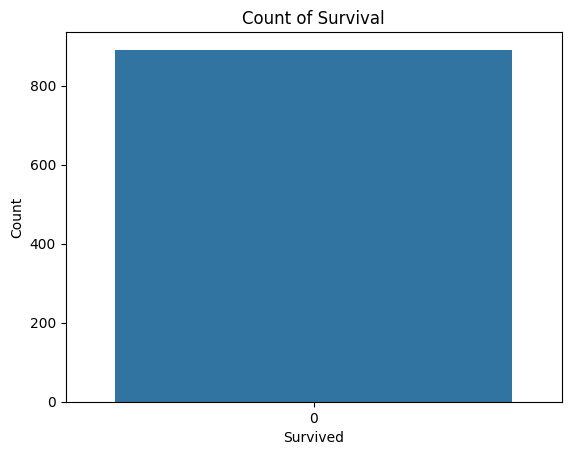

In [42]:
#EDA : Univariate Analysis
sns.countplot(train_data['Survived'])
plt.title('Count of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

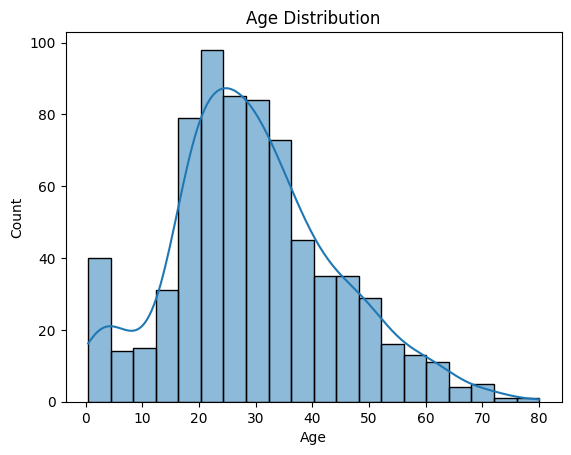

In [43]:
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<p><span>Obervation : </span>
<ol>
<li>more people are between age 20-30</li>
</ol>
</p>

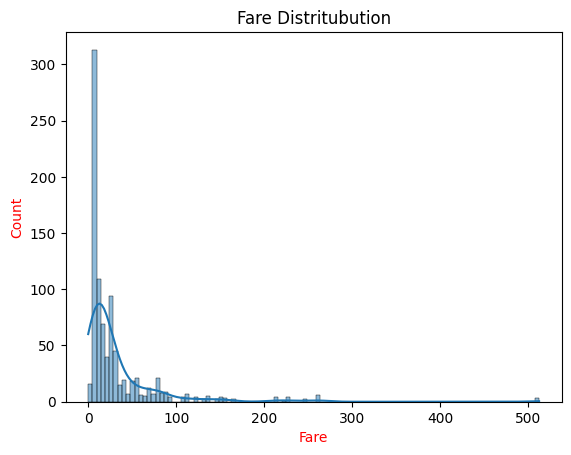

In [44]:
sns.histplot(train_data['Fare'], kde=True)
plt.title('Fare Distritubution')
plt.xlabel('Fare' ,color='red')
plt.ylabel('Count', color='red')
plt.show()

<p><span>Obervation : </span>
<ol>
<li>More people paid the fare between 0-100</li>
</ol>
</p>

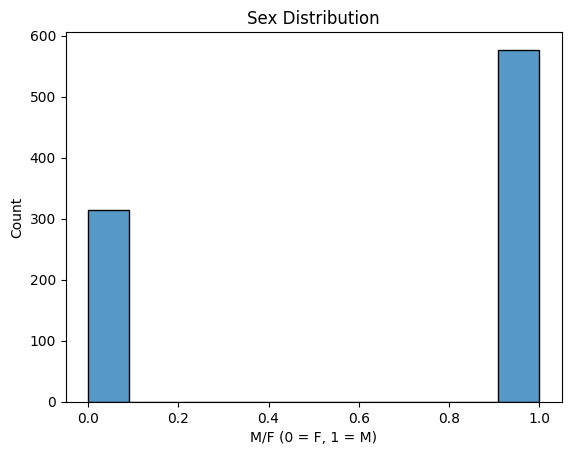

In [45]:
lbl = LabelEncoder()
train_data['Sex'] = lbl.fit_transform(train_data['Sex'])
sns.histplot(train_data['Sex'])
plt.title('Sex Distribution')
plt.xlabel('M/F (0 = F, 1 = M)')
plt.ylabel('Count')
plt.show()

<p><span>Obervation : </span>
<ol>
<li>Male are more than female</li>
</ol>
</p>

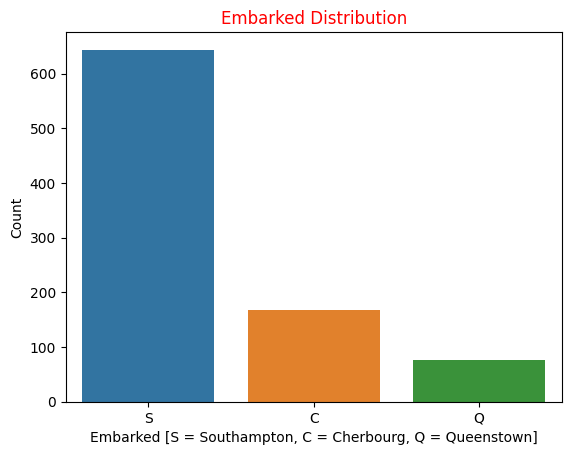

In [46]:
sns.countplot(x = 'Embarked', data = train_data)
plt.title('Embarked Distribution', color='red')
plt.xlabel('Embarked [S = Southampton, C = Cherbourg, Q = Queenstown]')
plt.ylabel('Count')
plt.show()

<p><span>Obervation : </span>
<ol>
<li>More People embarked from S(Southampton)</li>
</ol>
</p>

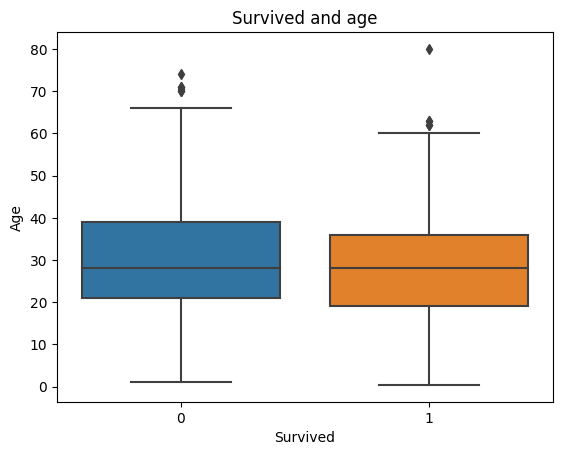

In [47]:
# Multivariate Analysis
sns.boxplot(x = 'Survived', y = 'Age', data=train_data)
plt.title('Survived and age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

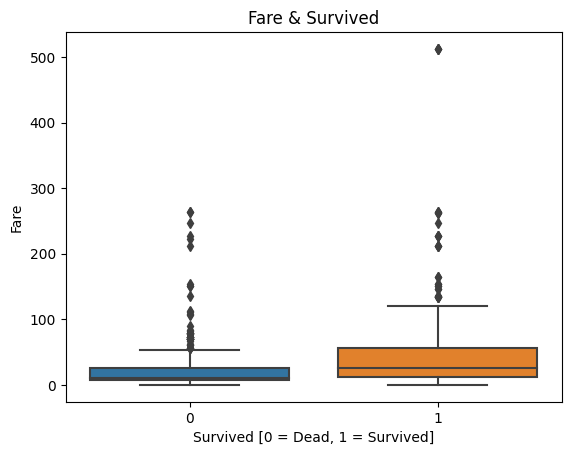

In [48]:
sns.boxplot(x = 'Survived', y = 'Fare', data = train_data)
plt.title('Fare & Survived')
plt.xlabel("Survived [0 = Dead, 1 = Survived]")
plt.ylabel('Fare')
plt.show()

<p><span>Obervation : </span>
<ol>
<li>people who paid more fare they have more survival numbers</li>
</ol>
</p>

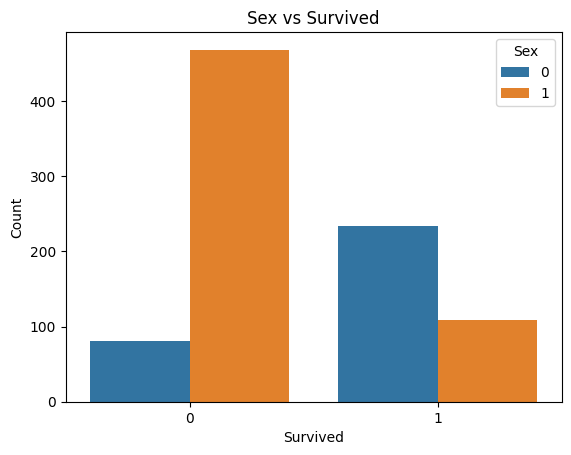

In [49]:
sns.countplot(x = 'Survived', hue='Sex', data = train_data)
plt.title('Sex vs Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<p> <span>Obervation :</span>
    <ol>
    <li>Female are more survived than female</li>
    <li>Male more unsurvived than females</li>
    </ol>
</p>

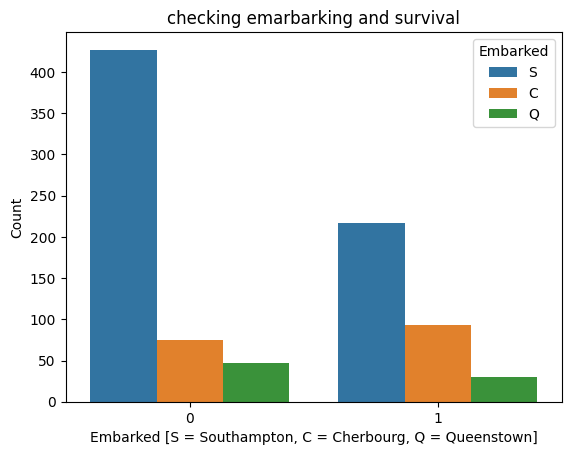

In [50]:
sns.countplot(x='Survived', hue='Embarked', data= train_data)
plt.title('checking emarbarking and survival')
plt.xlabel('Embarked [S = Southampton, C = Cherbourg, Q = Queenstown]')
plt.ylabel('Count')
plt.show()

<p><span>Obervation :</span>
<ol>
<li>More people are survieved which a embarked from the Southampton</li>
<li>More people unsurvived which are embarked from the Southampton</li>
<li>people are embarked from Queenstown have low Survived as well as low unsurvived numbers than other</li>
</ol>
</p>

C:\Users\vinay\AppData\Local\Temp\ipykernel_17096\3277636823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = train_data.corr()


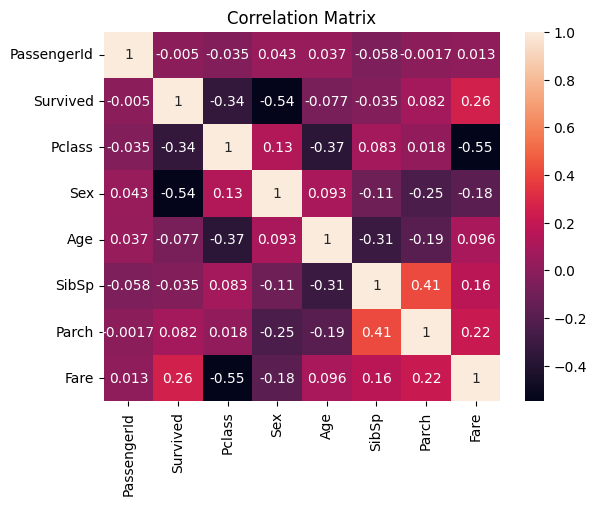

In [51]:
# Correlation Analysis
corr_mat = train_data.corr()
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

<p><span>Obervation : </span> <ol>
<li>Fare Got Positive value with Age</li>
<li>Survived has positive value with Fare (0.26)</li>
</ol></p>

<h2 style="text-align:center">Data Preprocessing & Feature selection</h2>

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
#train test spilt
x_train, x_test, y_train, y_test = train_test_split(train_data.drop(columns=['Survived']),train_data['Survived'],test_size=0.2, random_state = 42)

In [55]:
#drop unrelevant columns from the data
x_train.drop(columns=['PassengerId','Name','Cabin','Ticket'], inplace=True)

In [56]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,S
733,2,1,23.0,0,0,13.0000,S
382,3,1,32.0,0,0,7.9250,S
704,3,1,26.0,1,0,7.8542,S
813,3,0,6.0,4,2,31.2750,S


In [57]:
y_train.sample(5)

193    1
768    0
223    0
384    0
98     1
Name: Survived, dtype: int64

In [58]:
x_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [59]:
#encoding
encoded_val = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(handle_unknown='ignore'),['Age', 'Embarked'])],
    remainder='passthrough'
    )

In [60]:
#impute Missing values
impute_val = ColumnTransformer([('impute_age', SimpleImputer(),[2]),('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])], remainder='passthrough')

In [61]:
#scaling
from sklearn.preprocessing import MaxAbsScaler
Scale_val = ColumnTransformer([('scale',MaxAbsScaler(),slice(0,10))])

In [62]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
Feature_val = SelectKBest(score_func=chi2,k=8)

In [63]:
#train Model Decision tree
tree = DecisionTreeClassifier()

<h2>Create Pipeline</h2>

In [64]:
#defining pipeline
pipe = make_pipeline(encoded_val,impute_val,Scale_val,Feature_val,tree)

In [65]:
#train pipe
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Embarked'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MaxAbsScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x00000252052D1870>)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [66]:
y_pred = pipe.predict(x_test)

<h2 style="text-align:center">Cross validation </h2>

In [67]:
#cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()

0.6404510981975771

<h2 style="text-align:center">ROC curve </h2>

In [68]:
#Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

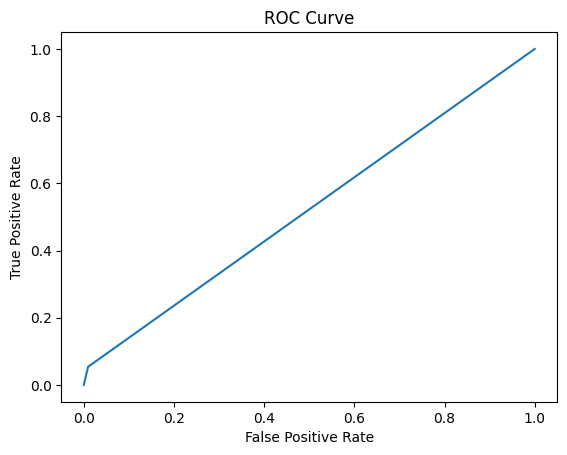

In [69]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [70]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8
Recall: 0.05405405405405406


<h2 style="text-align:center">Exporting a Pipeline</h2>
<p>So that we can use pipe for another data</p>

In [71]:
#exporting pipeline
import pickle
pickle.dump(pipe, open('titanic_pipe.pkl', 'wb'))

<p style="text-align:right">-Vinay Kharche </p>